In [ ]:
!pip install --upgrade pip==21.3
!pip install -U seaborn scikit-learn model-card-toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from datetime import date
from io import BytesIO
from IPython import display
import model_card_toolkit as mctlib
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_wine
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix, PrecisionRecallDisplay

import base64
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import uuid

In [ ]:
cancer = load_breast_cancer()

X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
482,13.470,14.06,87.32,546.3,0.10710,0.11550,0.05786,0.052660,0.1779,0.06639,...,14.830,18.32,94.94,660.2,0.1393,0.2499,0.18480,0.13350,0.3227,0.09326
337,18.770,21.43,122.90,1092.0,0.09116,0.14020,0.10600,0.060900,0.1953,0.06083,...,24.540,34.37,161.10,1873.0,0.1498,0.4827,0.46340,0.20480,0.3679,0.09870
313,11.540,10.72,73.73,409.1,0.08597,0.05969,0.01367,0.008907,0.1833,0.06100,...,12.340,12.87,81.23,467.8,0.1092,0.1626,0.08324,0.04715,0.3390,0.07434
80,11.450,20.97,73.81,401.5,0.11020,0.09362,0.04591,0.022330,0.1842,0.07005,...,13.110,32.16,84.53,525.1,0.1557,0.1676,0.17550,0.06127,0.2762,0.08851
412,9.397,21.68,59.75,268.8,0.07969,0.06053,0.03735,0.005128,0.1274,0.06724,...,9.965,27.99,66.61,301.0,0.1086,0.1887,0.18680,0.02564,0.2376,0.09206


In [ ]:
y_train.head()

482    1
337    0
313    1
80     1
412    1
dtype: int64

In [ ]:
# Utility function that will export a plot to a base-64 encoded string that the model card will accept.

def plot_to_str():
    img = BytesIO()
    plt.savefig(img, format='png')
    return base64.encodebytes(img.getvalue()).decode('utf-8')

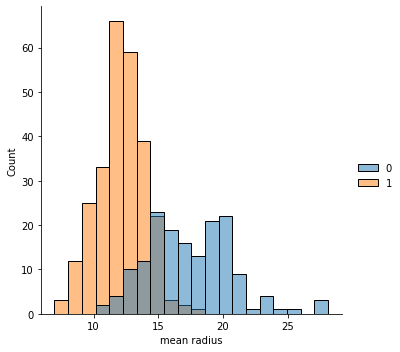

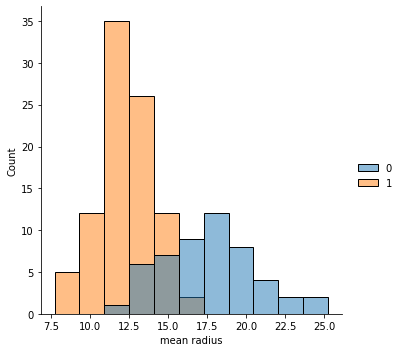

In [ ]:
# Plot the mean radius feature for both the train and test sets

sns.displot(x=X_train['mean radius'], hue=y_train)
mean_radius_train = plot_to_str()

sns.displot(x=X_test['mean radius'], hue=y_test)
mean_radius_test = plot_to_str()

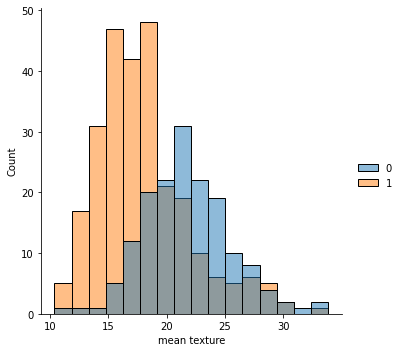

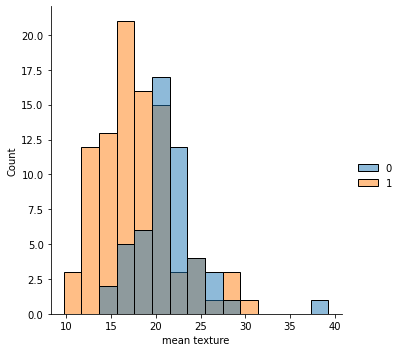

In [ ]:
# Plot the mean texture feature for both the train and test sets

sns.displot(x=X_train['mean texture'], hue=y_train)
mean_texture_train = plot_to_str()

sns.displot(x=X_test['mean texture'], hue=y_test)
mean_texture_test = plot_to_str()

## Train model

In [ ]:
# Create a classifier and fit the training data

clf = GradientBoostingClassifier().fit(X_train, y_train)

## Evaluate model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


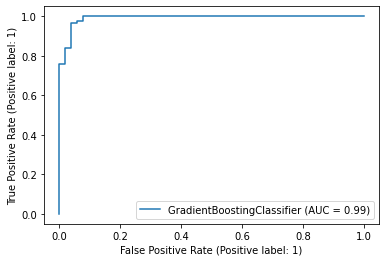

In [ ]:
# Plot a ROC curve

plot_roc_curve(clf, X_test, y_test)
roc_curve = plot_to_str()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


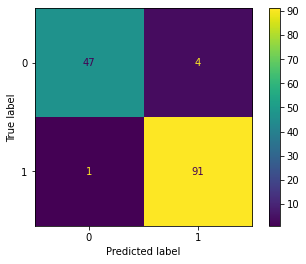

In [ ]:
# Plot a confusion matrix

plot_confusion_matrix(clf, X_test, y_test)
confusion_matrix = plot_to_str()

### Initialize toolkit and model card

In [ ]:
mct = mctlib.ModelCardToolkit()

model_card = mct.scaffold_assets()

In [ ]:
from io import BytesIO
import base64
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import uuid
with open('LearnBreast.png', "rb") as img:
    LearnBreast = base64.b64encode(img.read())
print(LearnBreast)


b'iVBORw0KGgoAAAANSUhEUgAAAZAAAAEYCAYAAAByXKB5AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAACaiSURBVHhe7d0NVFVV+gbwVrRWn06NpjaZICLgZIg5UJMrzZiylZXCVGYFpmNfJtnYUEbZSDMMNDmWZcWA1STVagVZZiFmn0aZrChtxOhLtCzHLDX8JtD3/39e9qErcoF948C53Oe31l6cfc5Vbrvree7eZ599Dvv9738vLCwsLCwstkUDhIiIyBYDhIiIAsIAISKigDBAiIgoIAwQIiIKCAOEiIgCwgAhIqKAMECIAvTOO+9ITEyMqRGFHgYIBaWIiAh57bXXTK1rWrp0qQwfPlyOO+44OfHEE2XEiBHy0ksvmaNEnY8BQkGpIwKkvr7ebHW84uJi6datm8yfP19+/PFH2b9/v7z99tty7bXXmle03YEDB/TPE7U3BggFJX8BghNlbm6u9O/fX7p37y6XX365bN261RwVueyyy6R3797yq1/9Sr/dV1ZWmiMi11xzjdx4441y4YUXyjHHHKN/P37P7NmzJS4uTv/MuHHjZO/evfr6t956S/r06aPb0NJr4Z///KecdNJJ8pvf/EaD4bDDDpMvvvjCHP0ZTvh9+/aV++67z+w51KxZs+Tqq682NZH169fr31dXV6f1c845R+68804ZNmyYHHXUUfL3v/9dfve73+kxx/333y+XXHKJbu/bt0/+8pe/6O/t1auX3HDDDbJnzx49RuQPA4SCkr8AeeCBB+TMM8+UjRs36knx+uuvl/Hjx5ujIo8//rjs2LFDj91yyy0SHx9vjjQECE787777rgYRTv74PYmJifLtt99qEA0cOFDy8vL09c0FiL/XlpaWanAhsHbv3i2pqal+A6SqqkqPVVdXmz2HakuAIAzw+7APvRgMhX3++ed6HBISEuTZZ5/VbbQFwgTvG+1z8cUXyx

### Annotate information into model card

In [ ]:
model_card.model_details.name = 'Breast Cancer Wisconsin (Diagnostic) Dataset'
model_card.model_details.overview = (
    'This model is trained on a binary classification dataset and determines whether breast cancer is benign or malignant based on '
    'image measurements.')
model_card.model_details.owners = [
    mctlib.Owner(name= 'Ethan Fang, Aidan Kelly, Justin Chong', contact='exf5204@psu.edu, aqk5773@psu.edu, jrc66@psu.edu')
]
model_card.model_details.references = [
    mctlib.Reference(reference='https://www.openml.org/search?type=data&status=active&id=1510&sort=runs'),
    mctlib.Reference(reference='https://minds.wisconsin.edu/bitstream/handle/1793/59692/TR1131.pdf')
]
model_card.model_details.version.name = str(uuid.uuid4())
model_card.model_details.version.date = str(date.today())

model_card.considerations.ethical_considerations = [mctlib.Risk(
    name=('Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. The target feature records the prognosis (benign (1) or malignant (2))'),
    mitigation_strategy='Automate the selection process'
)]
model_card.considerations.limitations = [mctlib.Limitation(description='Breast cancer diagnosis')]
model_card.considerations.use_cases = [
    mctlib.UseCase(description='Default catboost accuracy = 0.9790'),
    mctlib.UseCase(description='Flaml (5 min) accuracy = 0.9724'),
    mctlib.UseCase(description='Best ML leaner: catboost'),
    mctlib.UseCase(description='Best hyperparmeter config: {early_stopping_rounds: 11, learning_rate: 0.07357413194710388, n_estimators: 49})]')]
model_card.considerations.users = [mctlib.User(description='Students'), mctlib.User(description='ML researchers')]

model_card.model_parameters.data.append(mctlib.Dataset())
#model_card.model_parameters.data[0].graphics.description = (
  #f'{len(X_train)} rows with {30} features')
model_card.model_parameters.data[0].graphics.collection = [
    mctlib.Graphic(image=mean_radius_train),
    mctlib.Graphic(image=mean_texture_train)
]

model_card.quantitative_analysis.graphics.description = (
  'ROC curve and confusion matrix')
model_card.quantitative_analysis.graphics.collection = [
    mctlib.Graphic(image=roc_curve),
    mctlib.Graphic(image=confusion_matrix),
    mctlib.Graphic(image=LearnBreast)
]

mct.update_model_card(model_card)

## Generate model card


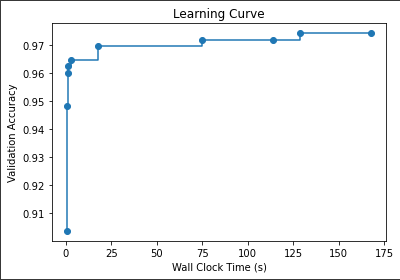

In [ ]:
# Return the model card document as an HTML page

html = mct.export_format()

display.display(display.HTML(html))

In [ ]:
html = mct.export_format()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import pickle
drive.mount('/content/drive')
DATA_PATH = "/content/drive/MyDrive"
infile = open(DATA_PATH+'/BreastCancerMC.pkl','rb')
automl = pickle.load(infile)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ValueError: ignored

In [ ]:

from flaml.data import load_openml_dataset
from flaml import AutoML
